In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
x_train=np.load("mhsma/x_128_train.npy")/255.0
x_test=np.load("mhsma/x_128_test.npy")/255.0
x_valid=np.load("mhsma/x_128_valid.npy")/255.0


In [19]:
y_train=np.stack([
    np.load("mhsma/y_acrosome_train.npy"),
    np.load("mhsma/y_head_train.npy"),
    np.load("mhsma/y_tail_train.npy"),
    np.load("mhsma/y_vacuole_train.npy")

],axis=1) 


In [20]:
y_valid=np.stack([
    np.load("mhsma/y_acrosome_valid.npy"),
    np.load("mhsma/y_head_valid.npy"),
    np.load("mhsma/y_tail_valid.npy"),
    np.load("mhsma/y_vacuole_valid.npy")

],axis=1) 


In [21]:
y_test=np.stack([
    np.load("mhsma/y_acrosome_test.npy"),
    np.load("mhsma/y_head_test.npy"),
    np.load("mhsma/y_tail_test.npy"),
    np.load("mhsma/y_vacuole_test.npy")

],axis=1) 
y_test

array([[1, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 1, 1, 0]], dtype=uint8)

In [22]:
x_train = x_train[..., np.newaxis]  # shape: (1000, 128, 128, 1)
x_valid = x_valid[..., np.newaxis]
x_test  = x_test[..., np.newaxis]
print("Train images shape:", x_valid.shape)
print("Train labels shape:", y_valid.shape)

Train images shape: (240, 128, 128, 1)
Train labels shape: (240, 4)


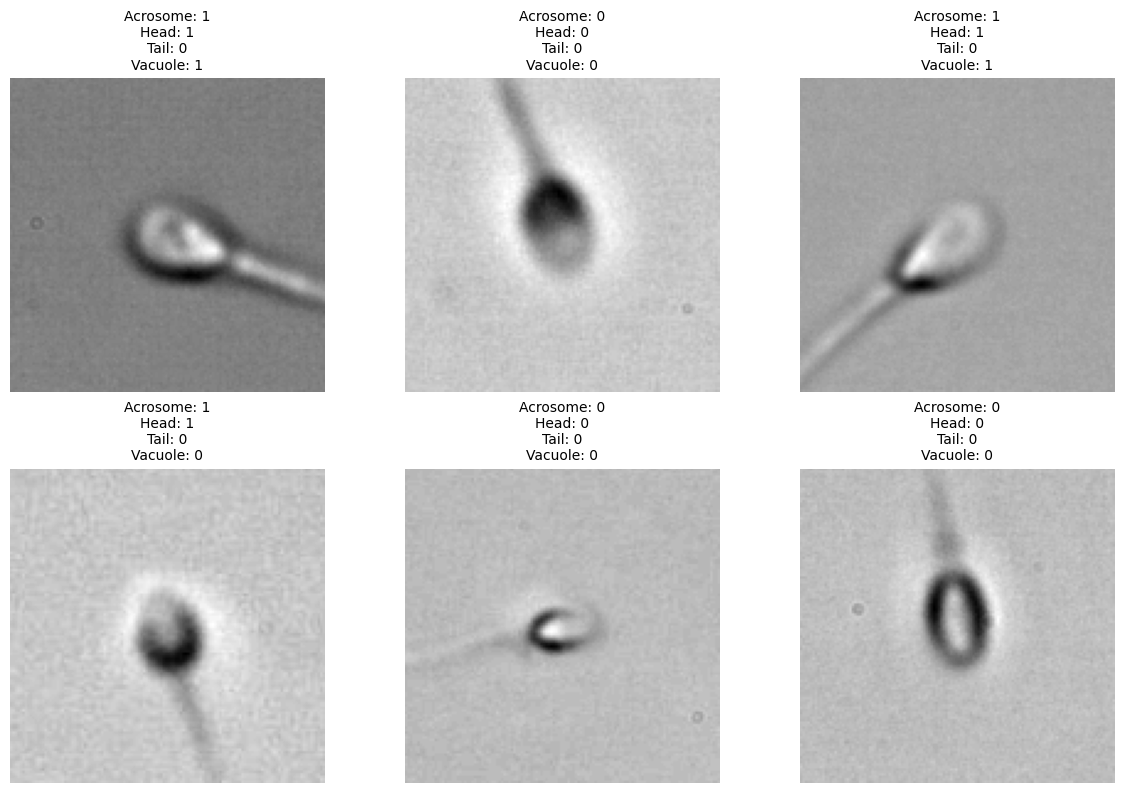

In [23]:
plt.figure(figsize=(12, 8))

label_names = ['Acrosome', 'Head', 'Tail', 'Vacuole']

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')  # squeeze لإزالة القناة 1
    plt.axis('off')
    
    # تجهيز النص: labels الخاصة بالصورة الحالية
    labels = y_train[i]
    label_text = "\n".join([f"{name}: {int(val)}" for name, val in zip(label_names, labels)])
    
    plt.title(label_text, fontsize=10)

plt.tight_layout()
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='sigmoid')  # 4 binary outputs
])


In [25]:


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=20,
    batch_size=32
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.4368 - loss: 0.5654 - val_accuracy: 0.1417 - val_loss: 0.4797
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.4156 - loss: 0.4958 - val_accuracy: 0.8167 - val_loss: 0.4435
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.4357 - loss: 0.5069 - val_accuracy: 0.8167 - val_loss: 0.4315
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.5294 - loss: 0.4991 - val_accuracy: 0.8167 - val_loss: 0.4423
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.4172 - loss: 0.4887 - val_accuracy: 0.8167 - val_loss: 0.4451
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.5292 - loss: 0.4782 - val_accuracy: 0.8167 - val_loss: 0.4254
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.5381 - loss: 0.4709 - val_accuracy: 0.8167 - val_loss: 0.4264
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.5453 - loss: 0.4725 - val_accuracy: 0.

In [26]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Accuracy: {acc}")

preds = model.predict(x_test)
preds_binary = (preds > 0.5).astype(int)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8203 - loss: 0.4494
Test Loss: 0.45707759261131287, Accuracy: 0.8233333230018616
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [27]:
model.save("my_model.h5")


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# تحميل النموذج المدرب
model = load_model("my_model.h5")

# تحميل صورة جديدة
img_path = "sample/mhsma-128-sample.png"  # مسار الصورة
img = image.load_img(img_path, target_size=(128, 128), color_mode="grayscale")

# تحويل الصورة إلى array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)      # (1, 128, 128, 1)
img_array /= 255.0                                  # تطبيع مثل التدريب


In [29]:
pred = model.predict(img_array)  # (1, 4)

# أسماء التصنيفات
label_names = ['Acrosome', 'Head', 'Tail', 'Vacuole']

# طباعة التنبؤات
for name, value in zip(label_names, pred[0]):
    print(f"{name}: {'Abnormal' if value > 0.5 else 'Normal'} ({value:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Acrosome: Normal (0.33)
Head: Normal (0.32)
Tail: Normal (0.09)
Vacuole: Normal (0.23)
